# Black Box Data Analysis

## Previous Notebooks

- [Data Ingestion and Cleaning](1-Data Ingestion and Cleaning.ipynb)

In [1]:
import pandas as pd
import google.datalab.bigquery as bq
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## EDA

In this notebook I'm going to analyze the data to find a way of binning the daily distances; first I'm going to use some arbitrary ranges, then I'll use quantiles to determine them.

This notebook has been run on [Cloud Datalab](https://cloud.google.com/datalab/), retrieving data using [Google BigQuery](https://cloud.google.com/bigquery/) queries by means of the `google.datalab.bigquery` module that allows the integration of jupyter notebooks executed on Datalab with the BigQuery environment.

### Arbitrary Ranges

In [5]:
query2 = bq.Query("""SELECT
  CASE
    WHEN km_day <=0 THEN 'A'
    WHEN km_day <= 10 THEN 'B'
    WHEN km_day <= 20 THEN 'C'
    WHEN km_day <= 30 THEN 'D'
    WHEN km_day <= 40 THEN 'E'
    WHEN km_day <= 50 THEN 'F'
    WHEN km_day <= 60 THEN 'G'
    WHEN km_day <= 100 THEN 'H'
    WHEN km_day <= 200 THEN 'I'
    WHEN km_day <= 300 THEN 'J'
    ELSE 'K'
  END AS bins
  ,COUNT(*) AS num
FROM
  `k2project-201805.trips.dataset2`
GROUP BY
  CASE
    WHEN km_day <=0 THEN 'A'
    WHEN km_day <= 10 THEN 'B'
    WHEN km_day <= 20 THEN 'C'
    WHEN km_day <= 30 THEN 'D'
    WHEN km_day <= 40 THEN 'E'
    WHEN km_day <= 50 THEN 'F'
    WHEN km_day <= 60 THEN 'G'
    WHEN km_day <= 100 THEN 'H'
    WHEN km_day <= 200 THEN 'I'
    WHEN km_day <= 300 THEN 'J'
    ELSE 'K'
  END
""")

df2 = query2.execute(output_options=bq.QueryOutput.dataframe()).result()

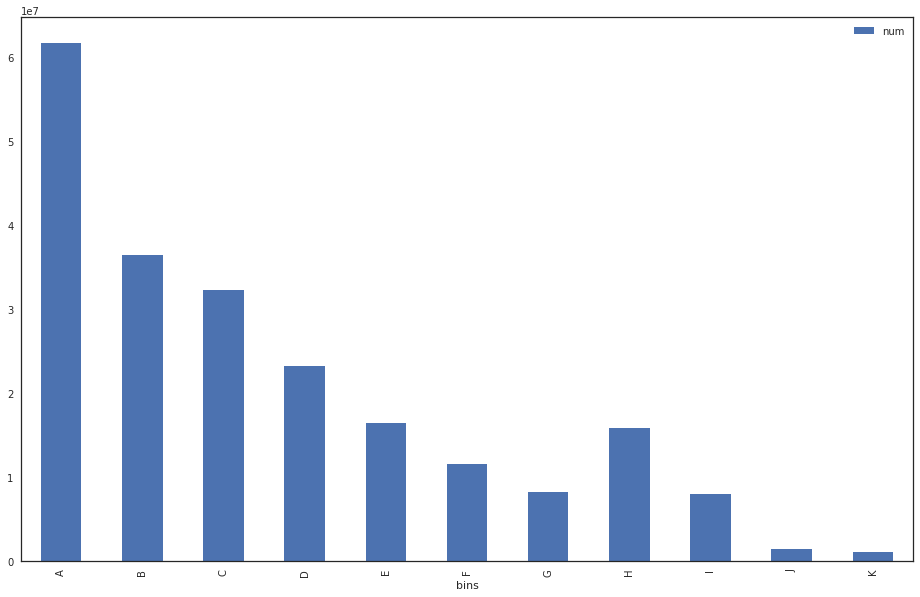

In [12]:
df2.sort_values(by='bins').set_index('bins').plot.bar(figsize=(16, 10));

### Quantiles

In [2]:
query = bq.Query("""SELECT
  APPROX_QUANTILES(km_day, 100) AS quantiles
FROM
  `k2project-201805.trips.dataset2`
""")

df = query.execute(output_options=bq.QueryOutput.dataframe()).result()

In [3]:
pd.DataFrame(df.loc[0].values[0]).head(50)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [4]:
pd.DataFrame(df.loc[0].values[0]).tail(50)

,0
51,13.408
52,14.075
53,14.728
54,15.382
55,16.09
56,16.793
57,17.511
58,18.244
59,18.998
60,19.77


The first quantile that has a value greater than zero is the 30th, so I'm putting all the quantiles under it in one bins that will contain all the days with zero km traveled.

### Quantiles' Ranges

In [13]:
query3 = bq.Query("""WITH QUANT
AS
(
SELECT
  APPROX_QUANTILES(km_day, 100) AS quantiles
FROM
  `k2project-201805.trips.dataset2`
)

SELECT
    CASE
      WHEN tr.km_day <= q.quantiles[ORDINAL(29)] THEN 'A'
      WHEN tr.km_day <= q.quantiles[ORDINAL(50)] THEN 'B'
      WHEN tr.km_day <= q.quantiles[ORDINAL(60)] THEN 'C'
      WHEN tr.km_day <= q.quantiles[ORDINAL(70)] THEN 'D'
      WHEN tr.km_day <= q.quantiles[ORDINAL(80)] THEN 'E'
      WHEN tr.km_day <= q.quantiles[ORDINAL(90)] THEN 'F'
      WHEN tr.km_day <= q.quantiles[ORDINAL(95)] THEN 'G'
      WHEN tr.km_day <= q.quantiles[ORDINAL(99)] THEN 'H'
      ELSE 'I'
    END AS quant
	,COUNT(*)
FROM
  `k2project-201805.trips.dataset2` AS tr
CROSS JOIN
  QUANT AS q
GROUP BY
	CASE
      WHEN tr.km_day <= q.quantiles[ORDINAL(29)] THEN 'A'
      WHEN tr.km_day <= q.quantiles[ORDINAL(50)] THEN 'B'
      WHEN tr.km_day <= q.quantiles[ORDINAL(60)] THEN 'C'
      WHEN tr.km_day <= q.quantiles[ORDINAL(70)] THEN 'D'
      WHEN tr.km_day <= q.quantiles[ORDINAL(80)] THEN 'E'
      WHEN tr.km_day <= q.quantiles[ORDINAL(90)] THEN 'F'
      WHEN tr.km_day <= q.quantiles[ORDINAL(95)] THEN 'G'
      WHEN tr.km_day <= q.quantiles[ORDINAL(99)] THEN 'H'
      ELSE 'I'
    END
""")

df3 = query3.execute(output_options=bq.QueryOutput.dataframe()).result()

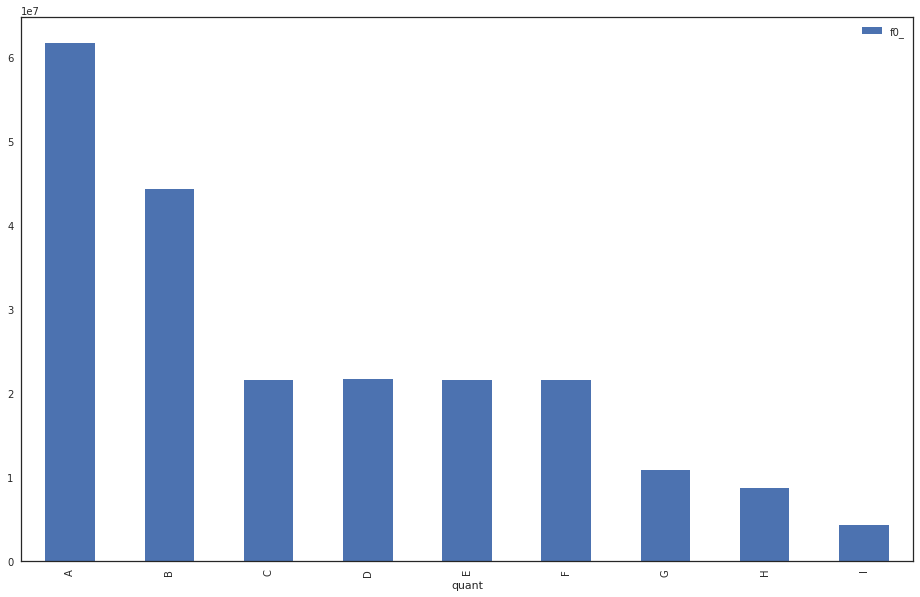

In [14]:
df3.sort_values(by='quant').set_index('quant').plot.bar(figsize=(16, 10));

## Following Notebooks

- [Apriori](3-Apriori.ipynb)
- [Clustering on the Cloud](4a-Clustering on Cloud.ipynb)
- [Clustering on Premises](4b-Clustering on Prem.ipynb)
- [Interpreting Clusters](5-Interpreting Clusters.ipynb)